### Creating A Stacked Bar Chart

This example shows how to create a stacked chart with information about crimes reported in London by type in the year 2020. This visualization can plot 2 variables in a single plot.

#### Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your environment.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [3]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

We have 12 different CSV files containing crime data for each month of 2020. We download each of them to the data folder.

In [4]:
files = [
  '2020-01-metropolitan-street.csv',
  '2020-02-metropolitan-street.csv',
  '2020-03-metropolitan-street.csv',
  '2020-04-metropolitan-street.csv',
  '2020-05-metropolitan-street.csv',
  '2020-06-metropolitan-street.csv',
  '2020-07-metropolitan-street.csv',
  '2020-08-metropolitan-street.csv',
  '2020-09-metropolitan-street.csv',
  '2020-10-metropolitan-street.csv',
  '2020-11-metropolitan-street.csv',
  '2020-12-metropolitan-street.csv'
]

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/crime/'

for f in files:
  url = os.path.join(data_url + f)
  download(url)


#### Data Pre-Processing

It will be helpful to merge all 12 CSV files into a single dataframe. We can use `pd.concat()` to merge a list of dataframes.

In [5]:
dataframe_list = []

for f in files:
    filepath = os.path.join(data_folder, f)
    df = pd.read_csv(filepath)
    dataframe_list.append(df)

merged_df = pd.concat(dataframe_list)

In [6]:
counts_by_type = merged_df.groupby(['Month', 'Crime type']).size()
counts_by_type

Month    Crime type                  
2020-01  Anti-social behaviour           17548
         Bicycle theft                    1172
         Burglary                         6889
         Criminal damage and arson        4374
         Drugs                            4282
                                         ...  
2020-12  Robbery                          2021
         Shoplifting                      2690
         Theft from the person            3075
         Vehicle crime                    7758
         Violence and sexual offences    17836
Length: 168, dtype: int64

The result is not in a suitable format for plotting. We call `unstack()` to create a dataframe.

In [7]:
counts_df = counts_by_type.unstack()
counts_df

Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
Month,,,,,,,,,,,,,,
2020-01,17548,1172,6889,4374,4282,832,9497,562,4025,3263,3853,4256,11975,18451
2020-02,16975,1044,6216,4220,3818,757,9729,452,3842,3152,3845,4570,10405,17959
2020-03,23014,1078,5362,4392,3657,813,7531,483,3966,2711,2996,3414,9621,18371
2020-04,62763,1060,3661,3496,4978,751,3884,460,3464,1101,1691,677,6327,15638
2020-05,58502,1768,3886,3906,6427,823,4443,533,4250,1293,1956,795,7277,18149
2020-06,39584,2548,4320,4353,4665,882,5387,463,4966,1705,2400,1194,8102,19629
2020-07,35588,2833,4928,4692,4569,892,6977,453,5584,2168,3099,2072,8811,20991
2020-08,35842,3019,4995,4710,3534,780,7647,451,5490,2530,3006,2542,8919,21317
2020-09,30863,3078,5195,4274,3541,964,7516,503,5167,2599,3060,2696,9829,20348


#### Creating a Chart

Now we can create the stacked bar chart. Instead of the default legend, we create a horizontal legend with a frame using the `legend()` function.

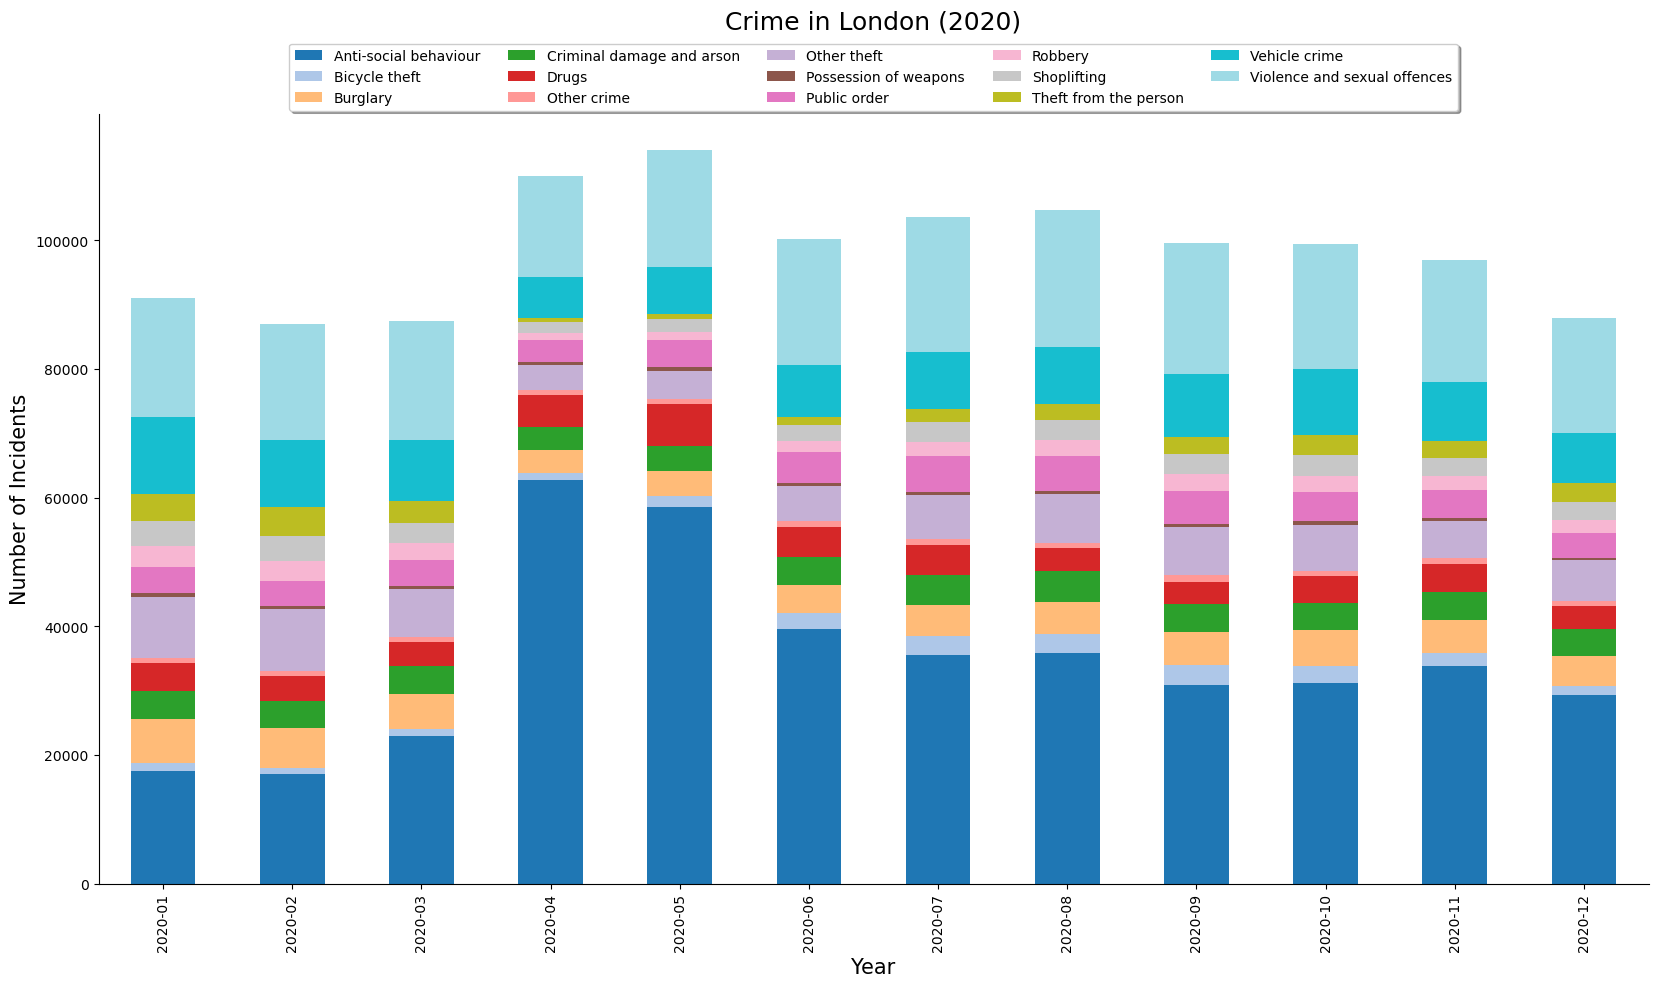

In [8]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20,10)

counts_df.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

ax.legend(loc='upper center', ncol=5, frameon=True, bbox_to_anchor=(0.5, 1.1), fancybox=True, shadow=True)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Year', size = 15)
ax.set_ylabel('Number of Incidents', size = 15)

ax.set_title('Crime in London (2020)', size = 18, y=1.1)

output_folder = 'output'
output_path = os.path.join(output_folder, 'stacked_chart.jpg')
plt.savefig(output_path)
plt.show()